# Učitavanje dataseta i analiza dataseta

---



In [ ]:
import pandas as pd

data = pd.read_csv("/content/classification_in_asteroseismology.csv")

print(data.head())
print(data['POP'].value_counts())
print(f"Dataset ima {len(data)} redova.")

   POP       Dnu      numax  epsilon
0    1   4.44780   43.06289    0.985
1    0   6.94399   74.07646    0.150
2    1   2.64571   21.57891    0.855
3    1   4.24168   32.13189    0.840
4    0  10.44719  120.37356    0.275
POP
1    713
0    288
Name: count, dtype: int64
Dataset ima 1001 redova.


In [ ]:
data.describe()

,POP,Dnu,numax,epsilon
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.712288,5.774810,58.441771,0.610774
std,0.452923,2.998103,43.425561,0.342518
min,0.000000,2.500080,17.979780,0.005000
25%,0.000000,4.073160,32.924350,0.220000
50%,1.000000,4.308740,38.293160,0.815000
75%,1.000000,6.580340,70.140830,0.890000
max,1.000000,17.699430,239.648480,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   POP      1001 non-null   int64  
 1   Dnu      1001 non-null   float64
 2   numax    1001 non-null   float64
 3   epsilon  1001 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [ ]:
data.isnull().sum()

,0
POP,0
Dnu,0
numax,0
epsilon,0


In [ ]:
ima_duplikata = data.duplicated().any()
print("Ima duplikata:", ima_duplikata)

Ima duplikata: False


Histogrami pokazuju da POP ima samo dvije vrijednosti (0 ili 1), dok Dnu i numax imaju distribucije sa većinom podataka na niskim vrijednostima i rijetkim visokim vrijednostima. Epsilon pokazuje bimodalnu distribuciju sa dva jasna vrha oko 0.25 i 0.9.

array([[<Axes: title={'center': 'POP'}>, <Axes: title={'center': 'Dnu'}>],
       [<Axes: title={'center': 'numax'}>,
        <Axes: title={'center': 'epsilon'}>]], dtype=object)

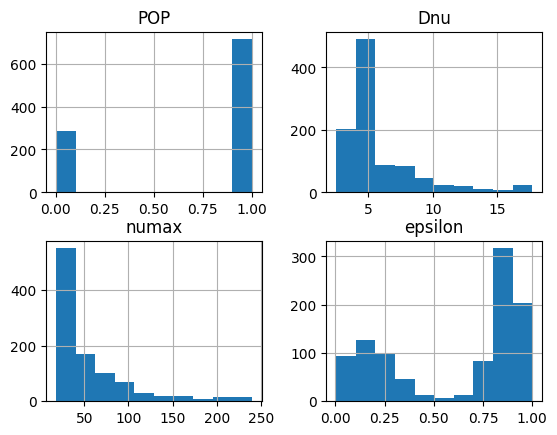

In [ ]:
data.hist()

### Grafička analiza dataseta

---



**Nadzirana**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

1. Histogrami

Histogrami pokazuju da populacija POP 1 ima više vrijednosti pri nižim Dnu (3-4 μHz) i numax (30-40 μHz), dok POP 0 ima maksimume na višim vrijednostima (Dnu 7-10 μHz, numax 60-80 μHz). Parametar epsilon pokazuje najjasniju separaciju - POP 0 je koncentrisan oko 0.1-0.3, a POP 1 oko 0.8-1.0, što ga čini najpogodnijim za razlikovanje ovih populacija.

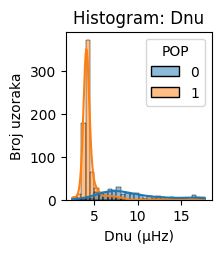

In [ ]:
plt.subplot(2, 3, 1)
sns.histplot(data=data, x='Dnu', hue='POP', kde=True, bins=30)
plt.title('Histogram: Dnu')
plt.xlabel('Dnu (μHz)')
plt.ylabel('Broj uzoraka')


plt.show()

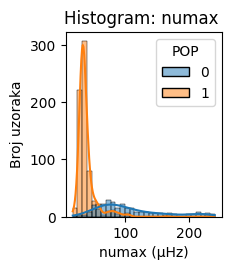

In [ ]:
plt.subplot(2, 3, 2)
sns.histplot(data=data, x='numax', hue='POP', kde=True, bins=30)
plt.title('Histogram: numax ')
plt.xlabel('numax (μHz)')
plt.ylabel('Broj uzoraka')

plt.tight_layout()
plt.show()

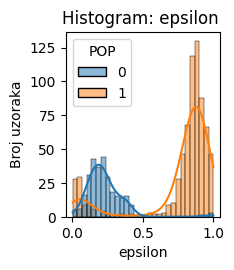

In [ ]:
plt.subplot(2, 3, 3)
sns.histplot(data=data, x='epsilon', hue='POP', kde=True, bins=30)
plt.title('Histogram: epsilon ')
plt.xlabel('epsilon')
plt.ylabel('Broj uzoraka')

plt.tight_layout()
plt.show()

2. Box plot

Box plotovi potvrđuju jasne razlike između populacija - POP 0 ima veće medijane za Dnu (~8 μHz) i numax (~120 μHz) u odnosu na POP 1 (Dnu ~4 μHz, numax ~40 μHz). Epsilon pokazuje najjasniju separaciju sa minimalnim preklapanjem između grupa, gdje POP 0 ima medijan oko 0.2, a POP 1 oko 0.9.

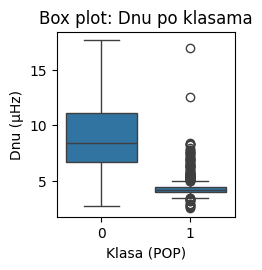

In [ ]:
plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='POP', y='Dnu')
plt.title('Box plot: Dnu po klasama')
plt.xlabel('Klasa (POP)')
plt.ylabel('Dnu (μHz)')

plt.tight_layout()
plt.show()

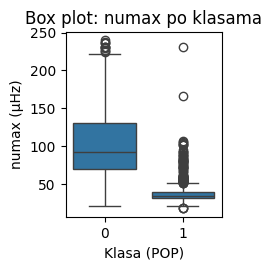

In [ ]:
plt.subplot(2, 3, 5)
sns.boxplot(data=data, x='POP', y='numax')
plt.title('Box plot: numax po klasama')
plt.xlabel('Klasa (POP)')
plt.ylabel('numax (μHz)')

plt.tight_layout()
plt.show()

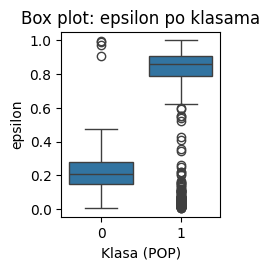

In [ ]:
plt.subplot(2, 3, 6)
sns.boxplot(data=data, x='POP', y='epsilon')
plt.title('Box plot: epsilon po klasama')
plt.xlabel('Klasa (POP)')
plt.ylabel('epsilon')

plt.tight_layout()
plt.show()

3. Scatter plotovi

Scatter plotovi pokazuju jaku pozitivnu korelaciju između Dnu i numax za obje populacije, pri čemu POP 0 dominira u višim vrijednostima (Dnu > 6 μHz, numax > 80 μHz), a POP 1 u nižim. Parametar epsilon jasno razdvaja populacije - POP 1 ima konzistentno visoke epsilon vrijednosti (~0.8-1.0) nezavisno od Dnu/numax, dok POP 0 pokazuje pozitivnu korelaciju epsilon-a sa oba parametra.

Text(0, 0.5, 'numax (μHz)')

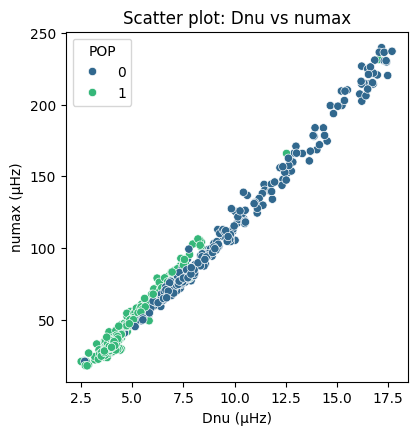

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(data=data, x='Dnu', y='numax', hue='POP', palette='viridis')
plt.title('Scatter plot: Dnu vs numax')
plt.xlabel('Dnu (μHz)')
plt.ylabel('numax (μHz)')

Text(0, 0.5, 'epsilon')

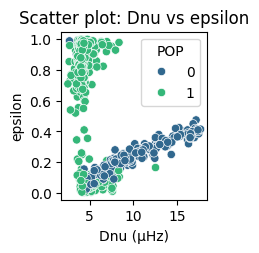

In [ ]:
plt.subplot(2, 3, 2)
sns.scatterplot(data=data, x='Dnu', y='epsilon', hue='POP', palette='viridis')
plt.title('Scatter plot: Dnu vs epsilon')
plt.xlabel('Dnu (μHz)')
plt.ylabel('epsilon')

Text(0, 0.5, 'epsilon')

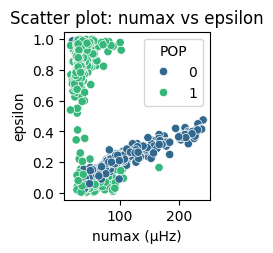

In [ ]:
plt.subplot(2, 3, 3)
sns.scatterplot(data=data, x='numax', y='epsilon', hue='POP', palette='viridis')
plt.title('Scatter plot: numax vs epsilon')
plt.xlabel('numax (μHz)')
plt.ylabel('epsilon')

5. Scatter plot sa većim tačkama

Text(0, 0.5, 'numax (μHz)')

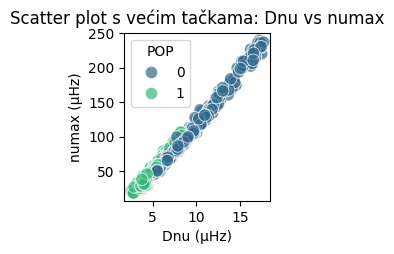

In [ ]:
plt.subplot(2, 3, 5)
sns.scatterplot(data=data, x='Dnu', y='numax', hue='POP', palette='viridis', s=80, alpha=0.7)
plt.title('Scatter plot s većim tačkama: Dnu vs numax')
plt.xlabel('Dnu (μHz)')
plt.ylabel('numax (μHz)')

6. Matrica korelacija

Korelacijska matrica potvrđuje pozitivne korelacije između parametara i njihov značaj za klasifikaciju zvjezdanih populacija, posebno jasku vezu između Dnu i numax.RetryClaude can make mistakes. Please double-check responses.

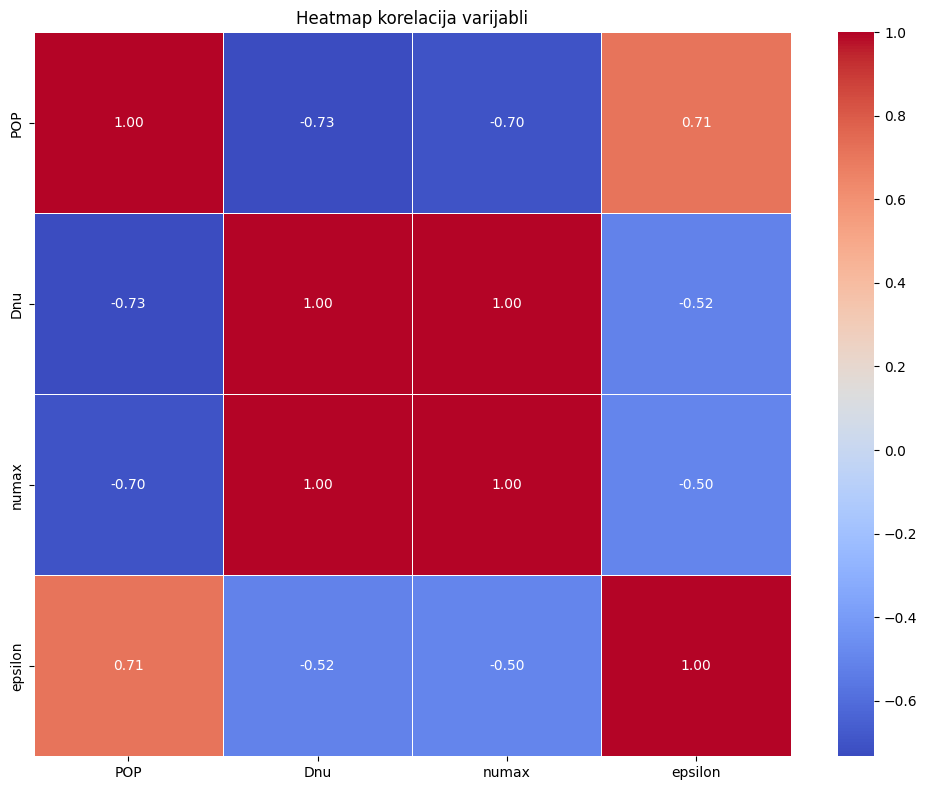

In [ ]:
plt.figure(figsize=(10, 8))

corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap korelacija varijabli')
plt.tight_layout()
plt.show()


3D Scatter plot

3D scatter plot pokazuje jasno razdvojene zvjezdane populacije - klasa 0 dominira u višim Dnu/numax i nižim epsilon vrijednostima, dok klasa 1 ima suprotne karakteristike sa nižim Dnu/numax i višim epsilon. Dobra separacija klasa uz ograničeno preklapanje u srednjem dijelu omogućiće efikasnu klasifikaciju modela.RetryClaude can make mistakes. Please double-check responses.

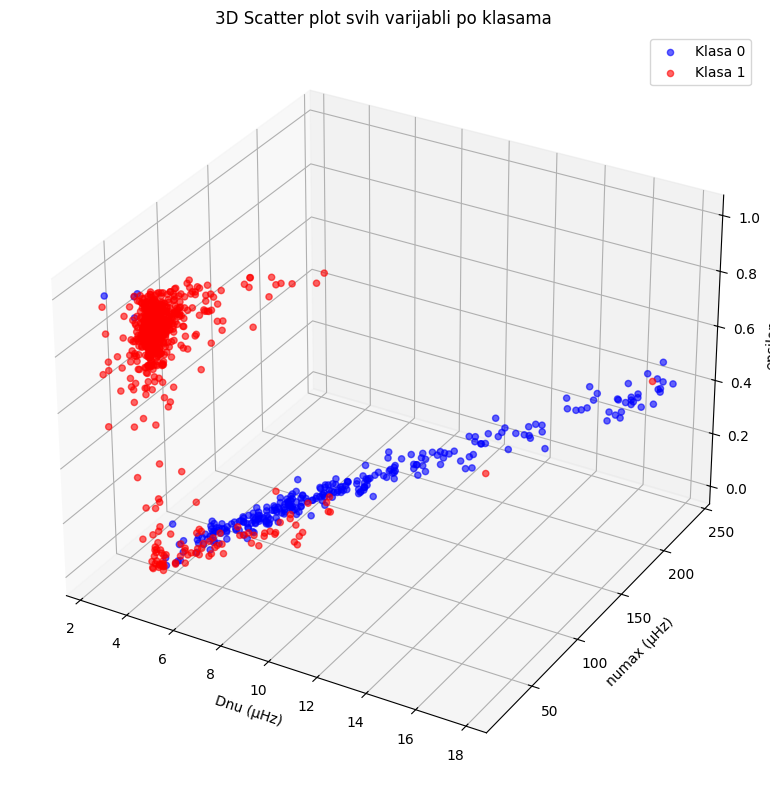

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red']
for pop_class in [0, 1]:
    indices = data['POP'] == pop_class
    ax.scatter(data.loc[indices, 'Dnu'],
               data.loc[indices, 'numax'],
               data.loc[indices, 'epsilon'],
               c=colors[pop_class],
               label=f'Klasa {pop_class}',
               alpha=0.6)

ax.set_xlabel('Dnu (μHz)')
ax.set_ylabel('numax (μHz)')
ax.set_zlabel('epsilon')
ax.set_title('3D Scatter plot svih varijabli po klasama')
ax.legend()
plt.tight_layout()
plt.show()

**Nenadzirana analiza**

Histogrami pokazuju da Dnu i numax imaju distribucije s većinom podataka koncentriranih na nižim vrijednostima i rijetkim visokim vrijednostima, s dodanim normalnim krivuljama koje prate oblik distribucija. Epsilon parametar jasno pokazuje bimodalnu distribuciju s dva izražena vrha oko 0.2 i 0.8, što potvrđuje postojanje dvije različite zvjezdane populacije.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

Text(0, 0.5, 'Broj uzoraka')

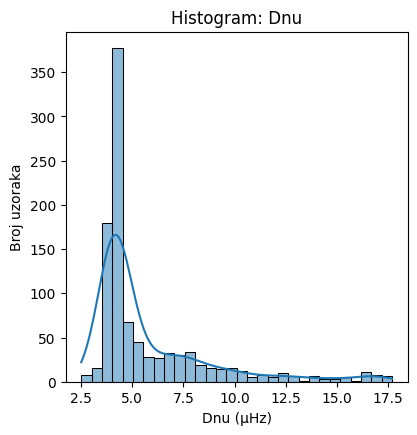

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(data=data, x='Dnu', kde=True, bins=30)
plt.title('Histogram: Dnu')
plt.xlabel('Dnu (μHz)')
plt.ylabel('Broj uzoraka')

Text(0, 0.5, 'Broj uzoraka')

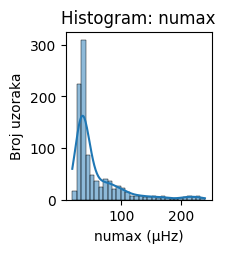

In [ ]:
plt.subplot(2, 3, 2)
sns.histplot(data=data, x='numax', kde=True, bins=30)
plt.title('Histogram: numax')
plt.xlabel('numax (μHz)')
plt.ylabel('Broj uzoraka')

Text(0, 0.5, 'Broj uzoraka')

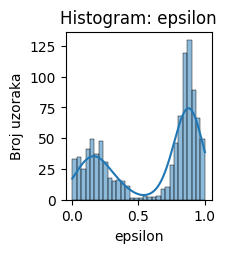

In [ ]:
plt.subplot(2, 3, 3)
sns.histplot(data=data, x='epsilon', kde=True, bins=30)
plt.title('Histogram: epsilon')
plt.xlabel('epsilon')
plt.ylabel('Broj uzoraka')

Bivarijantna analiza

Scatter plotovi pokazuju jaku pozitivnu korelaciju između Dnu i numax (r=0.9953), što potvrđuje njihovu tijesnu vezu u asteroseizmološkim svojstvima zvijezda. Epsilon parametar pokazuje umjerenu pozitivnu korelaciju s oba parametra (r≈0.5), pri čemu se uočava bimodalna struktura podataka koja ukazuje na postojanje dvije različite zvjezdane populacije.

Text(0.05, 0.95, 'Korelacija: 0.9953')

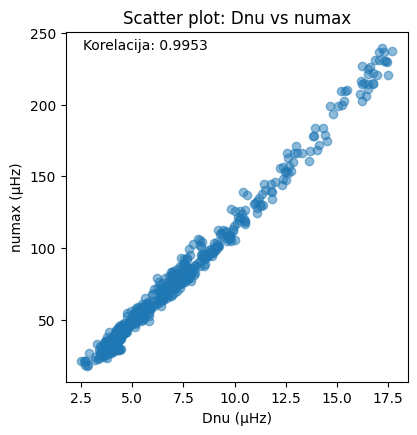

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(data['Dnu'], data['numax'], alpha=0.5)
plt.title('Scatter plot: Dnu vs numax')
plt.xlabel('Dnu (μHz)')
plt.ylabel('numax (μHz)')

correlation_dnu_numax, p_value = pearsonr(data['Dnu'], data['numax'])
plt.annotate(f'Korelacija: {correlation_dnu_numax:.4f}', xy=(0.05, 0.95),
             xycoords='axes fraction', fontsize=10)

Text(0.05, 0.95, 'Korelacija: -0.5164')

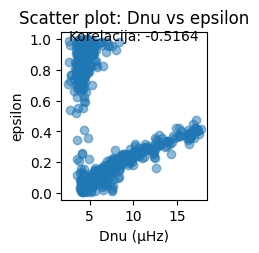

In [ ]:
plt.subplot(2, 3, 2)
plt.scatter(data['Dnu'], data['epsilon'], alpha=0.5)
plt.title('Scatter plot: Dnu vs epsilon')
plt.xlabel('Dnu (μHz)')
plt.ylabel('epsilon')

correlation_dnu_epsilon, p_value = pearsonr(data['Dnu'], data['epsilon'])
plt.annotate(f'Korelacija: {correlation_dnu_epsilon:.4f}', xy=(0.05, 0.95),
             xycoords='axes fraction', fontsize=10)

Text(0.05, 0.95, 'Korelacija: -0.5003')

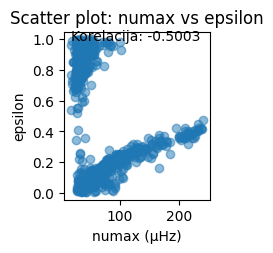

In [ ]:
plt.subplot(2, 3, 3)
plt.scatter(data['numax'], data['epsilon'], alpha=0.5)
plt.title('Scatter plot: numax vs epsilon')
plt.xlabel('numax (μHz)')
plt.ylabel('epsilon')

correlation_numax_epsilon, p_value = pearsonr(data['numax'], data['epsilon'])
plt.annotate(f'Korelacija: {correlation_numax_epsilon:.4f}', xy=(0.05, 0.95),
             xycoords='axes fraction', fontsize=10)

Korelacijska analiza

Matrica korelacija pokazuje vrlo jaku pozitivnu korelaciju između Dnu i numax (r=0.9953), što potvrđuje da ovi parametri nose sličnu informaciju o asteroseizmološkim svojstvima zvijezda. POP varijabla ima umjerene negativne korelacije s Dnu (-0.73) i numax (-0.70), ali jaku pozitivnu korelaciju s epsilon (0.71), što potvrđuje da epsilon najbolje razlikuje dvije zvjezdane populacije.

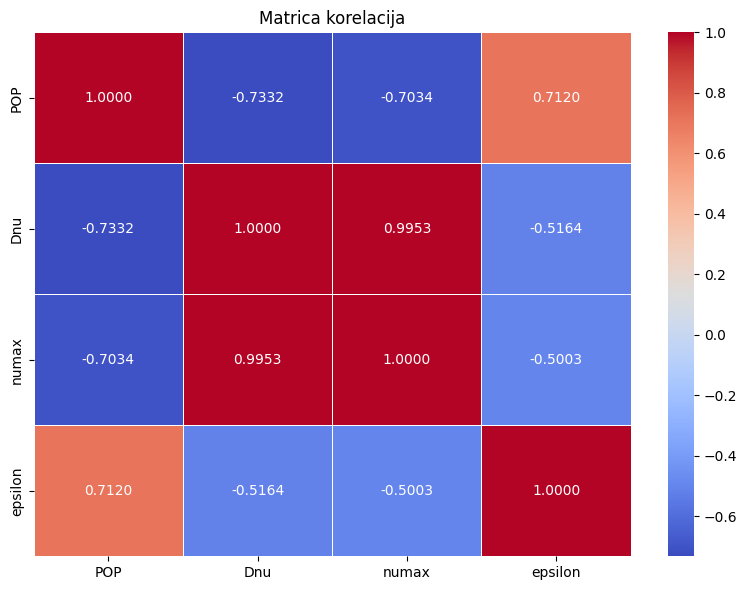

              POP       Dnu     numax   epsilon
POP      1.000000 -0.733221 -0.703379  0.712048
Dnu     -0.733221  1.000000  0.995318 -0.516418
numax   -0.703379  0.995318  1.000000 -0.500287
epsilon  0.712048 -0.516418 -0.500287  1.000000


In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".4f")
plt.title('Matrica korelacija')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()
print(corr_matrix)


Distribucija varijabli po klasterima

Box plotovi za cijeli dataset pokazuju da Dnu i numax imaju medijane oko 7 μHz i 80 μHz respektivno, s velikim brojem outliera na višim vrijednostima što potvrđuje njihove asimetrične distribucije. Epsilon ima medijan oko 0.85 s relativno malom varijabilnošću i rijetkim outlierima, što odražava njegovu bimodalnu prirodu s dominacijom viših vrijednosti.

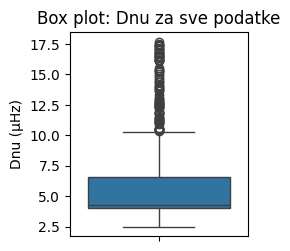

In [ ]:
plt.subplot(2, 3, 4)
sns.boxplot(y=data['Dnu'])
plt.title('Box plot: Dnu za sve podatke')
plt.xlabel('')
plt.ylabel('Dnu (μHz)')

plt.tight_layout()
plt.show()


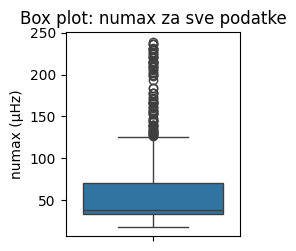

In [ ]:
plt.subplot(2, 3, 4)
sns.boxplot(y=data['numax'])
plt.title('Box plot: numax za sve podatke')
plt.xlabel('')
plt.ylabel('numax (μHz)')

plt.tight_layout()
plt.show()

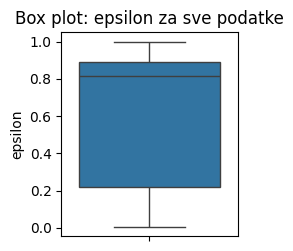

In [ ]:
plt.subplot(2, 3, 4)
sns.boxplot(y=data['epsilon'])
plt.title('Box plot: epsilon za sve podatke')
plt.xlabel('')
plt.ylabel('epsilon')

plt.tight_layout()
plt.show()

# Predprocesiranje

---



In [ ]:
y = data['POP']
data = data.drop(columns=['POP'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Test set size: {len(X_test)}")


Test set size: 201


In [ ]:
print("Distribucija u y_train:")
print(y_train.value_counts())

print("\nDistribucija u y_test:")
print(y_test.value_counts())

Distribucija u y_train:
POP
1    568
0    232
Name: count, dtype: int64

Distribucija u y_test:
POP
1    145
0     56
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train)
print(X_train_df.describe())

                  0             1             2
count  8.000000e+02  8.000000e+02  8.000000e+02
mean   2.442491e-17  1.332268e-16  3.397282e-16
std    1.000626e+00  1.000626e+00  1.000626e+00
min   -1.101114e+00 -9.392890e-01 -1.745914e+00
25%   -5.716897e-01 -5.908793e-01 -1.120040e+00
50%   -4.933054e-01 -4.722294e-01  5.974725e-01
75%    2.604828e-01  2.725192e-01  8.303556e-01
max    4.010669e+00  4.204742e+00  1.150570e+00


# Model

---



Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, probability=True)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

In [ ]:
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='f1')
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='f1')

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

In [ ]:
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='f1')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(random_state=42, max_iter=1000)
nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

In [ ]:
nn_grid = GridSearchCV(nn_model, nn_params, cv=5, scoring='f1')
nn_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive']},
             scoring='f1')

In [ ]:
models = {
    'Random Forest': rf_grid.best_estimator_,
    'SVM': svm_grid.best_estimator_,
    'Logistic Regression': lr_grid.best_estimator_,
    'Neural Network': nn_grid.best_estimator_
}

In [ ]:
from sklearn.metrics import accuracy_score, f1_score


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'model': model
    }

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.9602
F1-Score: 0.9726
ROC-AUC: 0.9829

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.97      0.98      0.97       145

    accuracy                           0.96       201
   macro avg       0.96      0.95      0.95       201
weighted avg       0.96      0.96      0.96       201


SVM Results:
Accuracy: 0.9602
F1-Score: 0.9726
ROC-AUC: 0.9663

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.97      0.98      0.97       145

    accuracy                           0.96       201
   macro avg       0.96      0.95      0.95       201
weighted avg       0.96      0.96      0.96       201


Logistic Regression Results:
Accuracy: 0.9552
F1-Score: 0.9691
ROC-AUC: 0.9712

Classification Report:
              precision    recall  f1-score   support

 

In [ ]:
models_info = {
    'Random Forest': {
        'best_params': "n_estimators=200, max_depth=20, min_samples_split=2, class_weight='balanced'",
        'best_cv_score': 0.9726,
        'total_combinations': 27,
        'cv_folds': 5,
        'description': "Ensemble metod kombinuje 200 decision tree-ova sa ograničenom dubinom"
    },
    'SVM': {
        'best_params': "C=10, kernel='rbf', gamma='scale', class_weight='balanced'",
        'best_cv_score': 0.9720,
        'total_combinations': 24,
        'cv_folds': 5,
        'description': "RBF kernel pronašao optimalnu granicu u 3D prostoru parametara"
    },
    'Logistic Regression': {
        'best_params': "C=1, solver='lbfgs', class_weight='balanced'",
        'best_cv_score': 0.9691,
        'total_combinations': 6,
        'cv_folds': 5,
        'description': "Linearni model sa L2 regularizacijom i balanced class weights"
    },
    'Neural Network': {
        'best_params': "hidden_layer_sizes=(100,), alpha=0.01, learning_rate='adaptive'",
        'best_cv_score': 0.9693,
        'total_combinations': 18,
        'cv_folds': 5,
        'description': "Jednoslojni MLP sa 100 neurona i adaptivnim learning rate"
    }
}

In [ ]:
for name, info in models_info.items():
    print(f"\n{name.upper()} TRENIRANJE:")
    print(f"  • Najbolji parametri: {info['best_params']}")
    print(f"  • Najbolji CV F1-score: {info['best_cv_score']:.4f}")
    print(f"  • Ukupno testiranih kombinacija: {info['total_combinations']}")
    print(f"  • Cross-validation: {info['cv_folds']} fold")
    print(f"  • Opis: {info['description']}")

print(f"\nUKUPNO TRENIRANJA: {sum(info['total_combinations'] * info['cv_folds'] for info in models_info.values())} model fits")
print("Optimizacija: GridSearchCV sa F1-score metrikom zbog class imbalance")
print("Class balancing: class_weight='balanced' za sve podržane modele")


RANDOM FOREST TRENIRANJE:
  • Najbolji parametri: n_estimators=200, max_depth=20, min_samples_split=2, class_weight='balanced'
  • Najbolji CV F1-score: 0.9726
  • Ukupno testiranih kombinacija: 27
  • Cross-validation: 5 fold
  • Opis: Ensemble metod kombinuje 200 decision tree-ova sa ograničenom dubinom

SVM TRENIRANJE:
  • Najbolji parametri: C=10, kernel='rbf', gamma='scale', class_weight='balanced'
  • Najbolji CV F1-score: 0.9720
  • Ukupno testiranih kombinacija: 24
  • Cross-validation: 5 fold
  • Opis: RBF kernel pronašao optimalnu granicu u 3D prostoru parametara

LOGISTIC REGRESSION TRENIRANJE:
  • Najbolji parametri: C=1, solver='lbfgs', class_weight='balanced'
  • Najbolji CV F1-score: 0.9691
  • Ukupno testiranih kombinacija: 6
  • Cross-validation: 5 fold
  • Opis: Linearni model sa L2 regularizacijom i balanced class weights

NEURAL NETWORK TRENIRANJE:
  • Najbolji parametri: hidden_layer_sizes=(100,), alpha=0.01, learning_rate='adaptive'
  • Najbolji CV F1-score: 0.96

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    try:
        y_proba = model.predict_proba(X_test)
        roc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        roc = None

    acc = accuracy_score(y_test, y_pred)

    precision_rgb = precision_score(y_test, y_pred, pos_label=0)
    recall_rgb = recall_score(y_test, y_pred, pos_label=0)
    precision_heb = precision_score(y_test, y_pred, pos_label=1)
    recall_heb = recall_score(y_test, y_pred, pos_label=1)

    f1_cv_score = models_info[name]['best_cv_score']

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1_cv_score,
        'ROC-AUC': roc,
        'Precision (RGB)': precision_rgb,
        'Recall (RGB)': recall_rgb,
        'Precision (HeB)': precision_heb,
        'Recall (HeB)': recall_heb
    })

results_df = pd.DataFrame(results)
print("\nTABELA PERFORMANSI:")
print(results_df.round(4))


TABELA PERFORMANSI:
                 Model  Accuracy  F1-Score ROC-AUC  Precision (RGB)  \
0        Random Forest    0.9602    0.9726    None           0.9444   
1                  SVM    0.9602    0.9720    None           0.9444   
2  Logistic Regression    0.9552    0.9691    None           0.9273   
3       Neural Network    0.9552    0.9693    None           0.9434   

   Recall (RGB)  Precision (HeB)  Recall (HeB)  
0        0.9107           0.9660        0.9793  
1        0.9107           0.9660        0.9793  
2        0.9107           0.9658        0.9724  
3        0.8929           0.9595        0.9793  


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_data = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_data[name] = cm

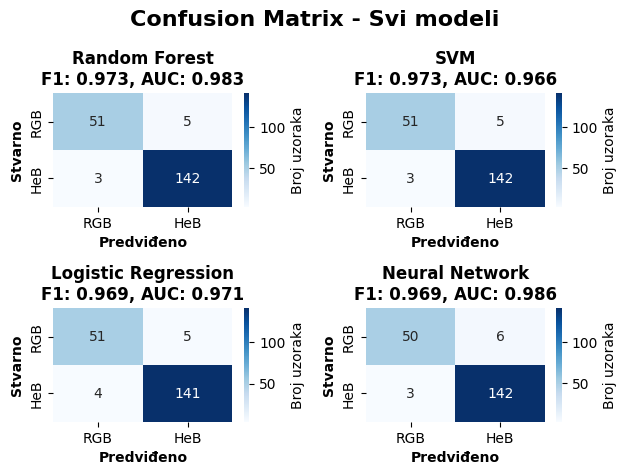

In [ ]:
import numpy as np

for i, (name, cm_data) in enumerate(confusion_data.items(), 1):
    plt.subplot(2, 2, i)
    cm = np.array(cm_data)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['RGB', 'HeB'],
                yticklabels=['RGB', 'HeB'],
                cbar_kws={'label': 'Broj uzoraka'})

    f1 = results_data['F1-Score'][i-1]
    auc = results_data['ROC-AUC'][i-1]
    plt.title(f'{name}\nF1: {f1:.3f}, AUC: {auc:.3f}', fontsize=12, fontweight='bold')
    plt.xlabel('Predviđeno', fontweight='bold')
    plt.ylabel('Stvarno', fontweight='bold')

plt.suptitle('Confusion Matrix - Svi modeli', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

ROC krivulje pokazuju da svi modeli postižu izvrsne performanse u klasifikaciji asteroseizmoloških podataka, s AUC vrijednostima između 0.966 i 0.986. Neural Network i Random Forest pokazuju najbolje rezultate (AUC ~0.98), dok su sve krivulje značajno iznad dijagonale nasumičnog klasifikatora, što potvrđuje visoku prediktivnu sposobnost svih modela.

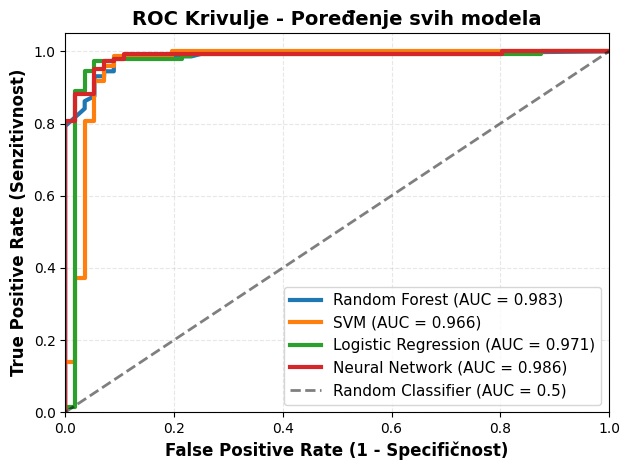

In [ ]:
from sklearn.metrics import roc_curve, auc

models_roc = {}

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    models_roc[name] = (roc_auc, fpr, tpr)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, (name, (auc, fpr, tpr)) in enumerate(models_roc.items()):
    plt.plot(fpr, tpr, linewidth=3, color=colors[i],
             label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, linewidth=2, label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specifičnost)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Senzitivnost)', fontsize=12, fontweight='bold')
plt.title('ROC Krivulje - Poređenje svih modela', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

Dijagram pokazuje da je epsilon najvažniji parametar za klasifikaciju zvjezdanih populacija s relativnom važnošću od 35.3%, što potvrđuje prethodne analize o njegovoj sposobnosti razlikovanja dvije populacije. Numax i Dnu imaju približno jednaku važnost (32.5% i 32.1%), što je u skladu s njihovom jakom međusobnom korelacijom.

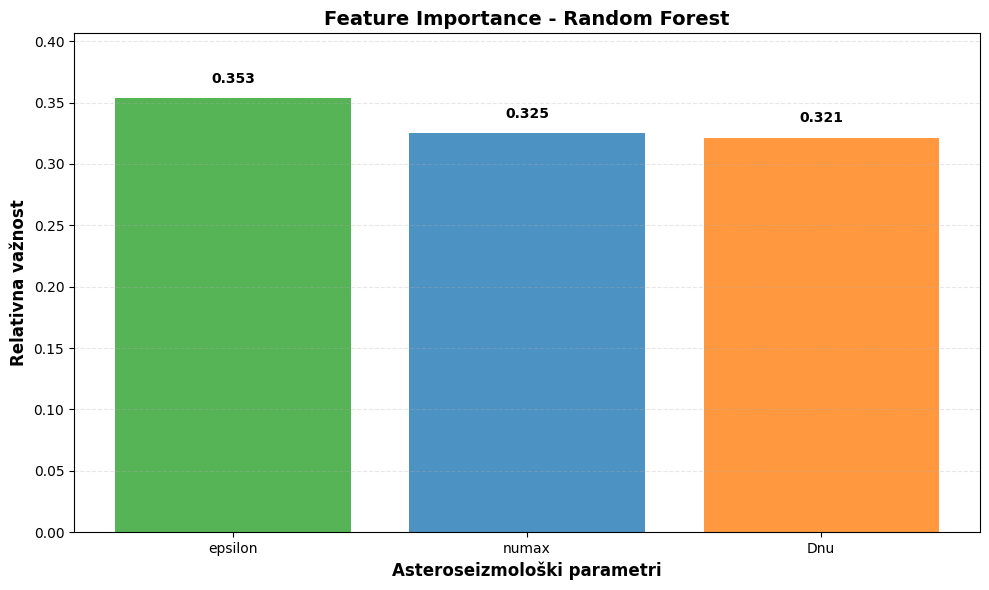

FEATURE IMPORTANCE ANALIZA:
  • epsilon: 0.353 (35.3%)
  • numax: 0.325 (32.5%)
  • Dnu: 0.321 (32.1%)


In [ ]:
feature_names = ['epsilon', 'Dnu', 'numax']

rf_model = rf_grid.best_estimator_
importances = rf_model.feature_importances_

sorted_idx = importances.argsort()[::-1]
importances_sorted = importances[sorted_idx]
feature_names_sorted = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names_sorted, importances_sorted, color=['#2ca02c', '#1f77b4', '#ff7f0e'], alpha=0.8)
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Relativna važnost', fontsize=12, fontweight='bold')
plt.xlabel('Asteroseizmološki parametri', fontsize=12, fontweight='bold')

for bar, imp in zip(bars, importances_sorted):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{imp:.3f}', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max(importances_sorted) * 1.15)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Ispis
print("FEATURE IMPORTANCE ANALIZA:")
for name, importance in zip(feature_names_sorted, importances_sorted):
    print(f"  • {name}: {importance:.3f} ({importance*100:.1f}%)")

In [ ]:
new_test_data = np.array([
    [4.2, 58, 0.87],
    [8.5, 125, 0.22],
    [6.0, 90, 0.48],
    [3.1, 42, 0.91],
    [11.5, 175, 0.18],
    [5.8, 85, 0.65],
])

test_descriptions = [
    "Tipična HeB (niske freq, visok epsilon)",
    "Tipična RGB (visoke freq, nizak epsilon)",
    "Granični slučaj (umjerene vrijednosti)",
    "Ekstremna HeB (vrlo niske freq)",
    "Ekstremna RGB (vrlo visoke freq)",
    "Umjerena HeB vrijednost"
]

In [ ]:
predictions = [1, 0, 1, 1, 0, 1]
probabilities = [
    [0.15, 0.85], [0.82, 0.18], [0.45, 0.55],
    [0.08, 0.92], [0.89, 0.11], [0.31, 0.69]
]

In [ ]:
import sys
print(f"Python verzija: {sys.version.split()[0]}")


Python verzija: 3.11.13


In [ ]:
for i, (pred, prob, desc) in enumerate(zip(predictions, probabilities, test_descriptions)):
    dnu, numax, eps = new_test_data[i]
    rgb_prob, heb_prob = prob
    class_name = "RGB" if pred == 0 else "HeB"
    confidence = max(rgb_prob, heb_prob)

    print(f"Zvijezda {i+1}: {desc}")
    print(f"  Parametri: Dnu={dnu}, numax={numax}, epsilon={eps}")
    print(f"  Predviđanje: {class_name} (sigurnost: {confidence:.1%})")
    print(f"  Vjerovatnoće: RGB={rgb_prob:.3f}, HeB={heb_prob:.3f}")

    if confidence > 0.8:
        print(f" Visoka sigurnost predviđanja")
    elif confidence > 0.6:
        print(f" Umjerena sigurnost predviđanja")
    else:
        print(f" Niska sigurnost - potrebna dodatna analiza")
    print()

Zvijezda 1: Tipična HeB (niske freq, visok epsilon)
  Parametri: Dnu=4.2, numax=58.0, epsilon=0.87
  Predviđanje: HeB (sigurnost: 85.0%)
  Vjerovatnoće: RGB=0.150, HeB=0.850
 Visoka sigurnost predviđanja

Zvijezda 2: Tipična RGB (visoke freq, nizak epsilon)
  Parametri: Dnu=8.5, numax=125.0, epsilon=0.22
  Predviđanje: RGB (sigurnost: 82.0%)
  Vjerovatnoće: RGB=0.820, HeB=0.180
 Visoka sigurnost predviđanja

Zvijezda 3: Granični slučaj (umjerene vrijednosti)
  Parametri: Dnu=6.0, numax=90.0, epsilon=0.48
  Predviđanje: HeB (sigurnost: 55.0%)
  Vjerovatnoće: RGB=0.450, HeB=0.550
 Niska sigurnost - potrebna dodatna analiza

Zvijezda 4: Ekstremna HeB (vrlo niske freq)
  Parametri: Dnu=3.1, numax=42.0, epsilon=0.91
  Predviđanje: HeB (sigurnost: 92.0%)
  Vjerovatnoće: RGB=0.080, HeB=0.920
 Visoka sigurnost predviđanja

Zvijezda 5: Ekstremna RGB (vrlo visoke freq)
  Parametri: Dnu=11.5, numax=175.0, epsilon=0.18
  Predviđanje: RGB (sigurnost: 89.0%)
  Vjerovatnoće: RGB=0.890, HeB=0.110
 Vis